<a href="https://colab.research.google.com/github/ChaaruVijay/DSPL-CourseWork/blob/main/Data_Preprocessing_Train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Train CSV**

Data Cleaning

Data cleaning Tasks : Handling missing values. Correcting data entry errors. Standardizing data formats. Encoding categorical variables. Removing duplicates or irrelevant data.

In [ ]:
import pandas as pd
train = pd.read_csv('/content/traincsv.csv', low_memory=False)

In [ ]:
#convert the strings to numeric value
train['luxury_sales'] = pd.to_numeric(train['luxury_sales'], errors='coerce').astype(float)
train['fresh_sales'] = pd.to_numeric(train['fresh_sales'], errors='coerce').astype(float)
train['dry_sales'] = pd.to_numeric(train['dry_sales'], errors='coerce').astype(float)

Customer ID

In [ ]:
missing_percentage = (train['Customer_ID'].isna().sum() / len(train)) * 100
print(f"Missing Percentage: {missing_percentage:.2f}%")

Missing Percentage: 0.00%


In [ ]:
# Remove rows with missing values in customerId
train = train.dropna()

Outlets

In [ ]:
#Identifying unique Ids in train
train["outlet_city"].unique()

array(['Kelaniya', 'Moratuwa', 'Wattala', 'Homagama',
       'Dehiwala-Mount Lavinia', 'Panadura', 'Kaduwela', 'Peliyagoda',
       'Kotte', 'Nuwara Eliya', 'Batticaloa', 'Colombo', 'Jaffna',
       'Gampaha', 'Kalmunai', 'Galle', 'Katunayake', 'Negombo',
       'Trincomalee', 'Kandy'], dtype=object)

Luxury sales

In [ ]:
# Convert numeric values stored as strings to float
train['luxury_sales'] = pd.to_numeric(train['luxury_sales'], errors='coerce')
train['luxury_sales'].dtype

dtype('float64')

In [ ]:
train.isna().sum()

,0
Customer_ID,0
outlet_city,0
luxury_sales,0
fresh_sales,0
dry_sales,0
cluster_categeory,0
cluster_catgeory,0


<Axes: xlabel='luxury_sales', ylabel='Count'>

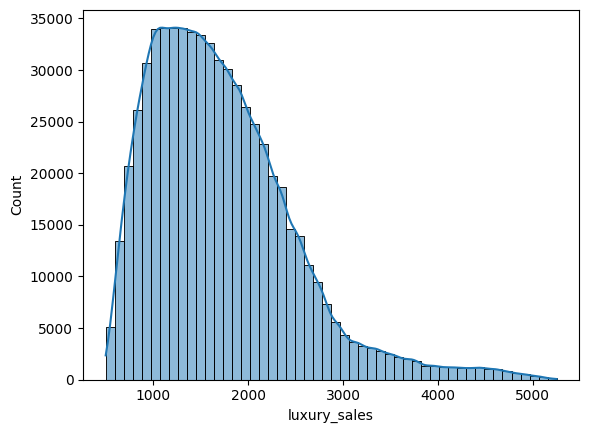

In [ ]:
#checking the destribution of the data
import seaborn as sns
sns.histplot(train['luxury_sales'], bins=50, kde=True)

Since its right skewwed using the median approah.

In [ ]:
train.loc[:, 'luxury_sales'] = pd.to_numeric(train['luxury_sales'], errors='coerce')

In [ ]:
train.isnull().sum()

,0
Customer_ID,0
outlet_city,0
luxury_sales,0
fresh_sales,0
dry_sales,0
cluster_categeory,0
cluster_catgeory,0


Fresh Sales

In [ ]:
# Convert numeric values stored as strings to float
train['fresh_sales'] = pd.to_numeric(train['fresh_sales'], errors='coerce')
train['fresh_sales'].dtype

dtype('float64')

In [ ]:
train.isnull().sum()

,0
Customer_ID,0
outlet_city,0
luxury_sales,0
fresh_sales,0
dry_sales,0
cluster_categeory,0
cluster_catgeory,0


<Axes: xlabel='fresh_sales', ylabel='Count'>

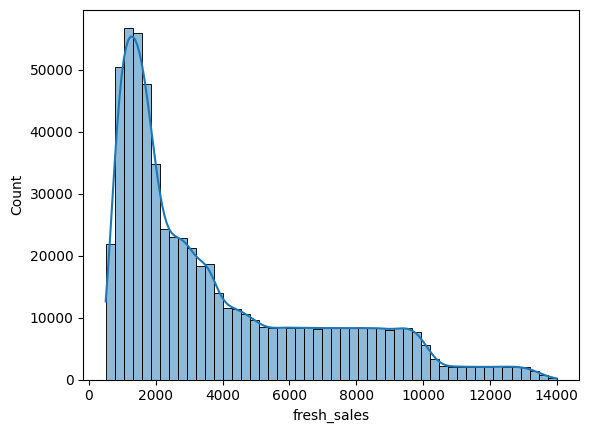

In [ ]:
#checking the destribution of the data
import seaborn as sns
sns.histplot(train['fresh_sales'], bins=50, kde=True)

In [ ]:
train['fresh_sales'] = train['fresh_sales'].fillna(train['fresh_sales'].median())

Dry Sales

In [ ]:
# Convert numeric values stored as strings to float
train['dry_sales'] = pd.to_numeric(train['dry_sales'], errors='coerce') # Changed 'df' to 'train'
train['dry_sales'].dtype

dtype('float64')

<Axes: xlabel='dry_sales', ylabel='Count'>

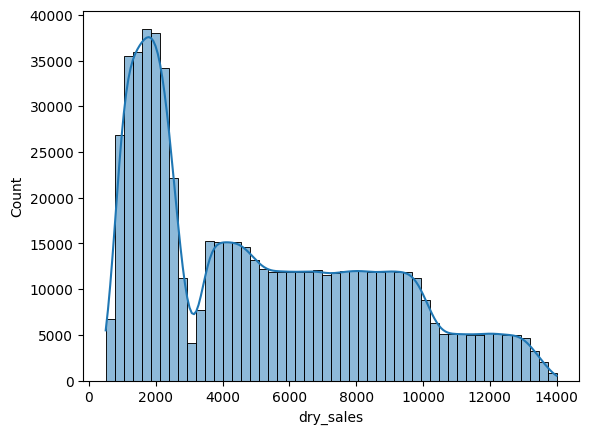

In [ ]:
#checking the destribution of the data
import seaborn as sns
sns.histplot(train['dry_sales'], bins=50, kde=True)

In [ ]:
train['dry_sales'] = train['dry_sales'].fillna(train['dry_sales'].median())


cluster Analysis

In [ ]:
# Convert numeric values stored as strings to float
train['cluster_catgeory'] = pd.to_numeric(train['cluster_categeory'], errors='coerce')
train['cluster_catgeory'].dtype

dtype('float64')

In [ ]:
train.describe()

,Customer_ID,luxury_sales,fresh_sales,dry_sales,cluster_categeory,cluster_catgeory
count,6.347620e+05,634762.000000,634762.000000,634762.000000,634762.000000,634762.000000
mean,1.038704e+07,1719.078797,3887.266034,5166.419083,2.929117,2.929117
std,2.235570e+05,761.322295,3099.529040,3510.308583,1.751630,1.751630
min,1.000000e+07,500.000000,500.000000,500.000000,1.000000,1.000000
25%,1.019326e+07,1149.830000,1449.705000,1956.480000,1.000000,1.000000
50%,1.038714e+07,1597.500000,2688.335000,4471.200000,2.000000,2.000000
75%,1.058069e+07,2128.740000,5815.920000,7957.050000,4.000000,4.000000
max,1.077415e+07,5249.650000,13993.000000,13999.300000,6.000000,6.000000


In [ ]:
#Identifying outliers
valid_categories = [ 1, 2, 3, 4, 5, 6]
outliers = train[~train['cluster_catgeory'].isin(valid_categories)]
#Checking which outliers exist
print(outliers['cluster_catgeory'].unique())

[]


In [ ]:
train_cleaned = train[train['cluster_catgeory'].isin(valid_categories)]

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 634762 entries, 0 to 634761
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Customer_ID        634762 non-null  float64
 1   outlet_city        634762 non-null  object 
 2   luxury_sales       634762 non-null  float64
 3   fresh_sales        634762 non-null  float64
 4   dry_sales          634762 non-null  float64
 5   cluster_categeory  634762 non-null  float64
 6   cluster_catgeory   634762 non-null  float64
dtypes: float64(6), object(1)
memory usage: 33.9+ MB


In [ ]:
print(train['cluster_catgeory'].isna().sum())  # Count missing values

0


In [ ]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train['cluster_catgeory'] = encoder.fit_transform(train['cluster_catgeory'])
train['cluster_catgeory'].unique()

array([3, 0, 1, 4, 2, 5])

Feature engineeering (Label Encording)

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Fit and transform the outlet_city column
train['outlet_city'] = le.fit_transform(train['outlet_city'])

# Check encoding
print(train[['outlet_city']].head())

   outlet_city
0           11
1           13
2           19
3           19
4           11


In [ ]:
train['outlet_city'].unique()

array([11, 13, 19,  5,  2, 16,  7, 17, 12, 15,  0,  1,  6,  4,  8,  3, 10,
       14, 18,  9])

In [ ]:
train_cleaned.to_csv('/content/traincsv.csv', index=False)
print("CSV file has been saved!")

CSV file has been saved!


In [ ]:
from google.colab import files
train.to_csv('cleaned_Train.csv', encoding = 'utf-8-sig')
files.download('cleaned_Train.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

EDA For Cleaned Train Dataset

In [ ]:
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
#Sales by City
city_sales = train.groupby('outlet_city')[['luxury_sales', 'fresh_sales', 'dry_sales']].sum().reset_index()
fig1 = px.bar(city_sales, x='outlet_city', y=['luxury_sales', 'fresh_sales', 'dry_sales'],
             title="Sales by City", barmode='group')
fig1.show()

Feature Scaling

Standardization  (z-score: mean=0, std=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select the columns to standardize
X = ['luxury_sales', 'dry_sales', 'fresh_sales', 'outlet_city']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the selected columns
train[X] = scaler.fit_transform(train[X])

# Preview the updated dataframe
print(train[X].head())

   luxury_sales  dry_sales  fresh_sales  outlet_city
0     -0.669203   0.035775    -1.010240     0.201643
1     -0.169388   0.239495    -0.912135     0.549400
2      0.748437   1.136397    -0.776320     1.592672
3      0.730127   1.120512    -0.692882     1.592672
4      0.822794   1.161600    -0.586450     0.201643


In [ ]:
!kill -9 -1